In [60]:
#South Africa Coronary heart disease analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.decomposition import PCA
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

heart = pd.read_csv('SAHeart.txt', header=0)
heart['famhist'].replace("Present", 1, inplace=True)
heart['famhist'].replace("Absent", 0, inplace=True)

heart = heart.drop("row.names", axis=1)
#heart.info()
print(heart.head())
print()

#Design matrix with size (462, 9)
X = heart.iloc[:,:9] 
#targets chd or no chd, with size (462,)
y = heart.iloc[:,9] #targets

print("Data information")
print("Design matrix ", X.shape)
print("Targets", y.shape)

   sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  160    12.00  5.73      23.11        1     49    25.30    97.20   52    1
1  144     0.01  4.41      28.61        0     55    28.87     2.06   63    1
2  118     0.08  3.48      32.28        1     52    29.14     3.81   46    0
3  170     7.50  6.41      38.03        1     51    31.99    24.26   58    1
4  134    13.60  3.50      27.78        1     60    25.99    57.34   49    1

Data information
Design matrix  (462, 9)
Targets (462,)


Shape of the correlation matrix:  (9, 9)


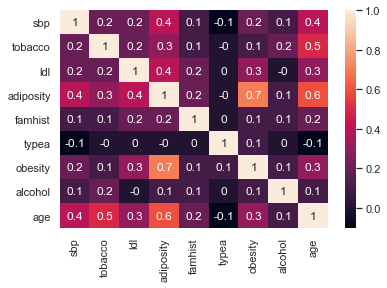

In [90]:
#Correlation matrix

correlation_matrix = X.corr().round(1)
print("Shape of the correlation matrix: ",correlation_matrix.shape)
#plt.figure(figsize=(10,5))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

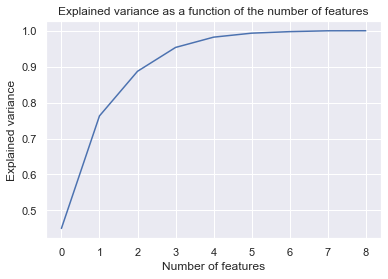

In [64]:
#PCA analysis

pca = PCA().fit(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of features')
plt.ylabel('Explained variance')
plt.title("Explained variance as a function of the number of features")
plt.show()

In [84]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

#now scale the data
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print()
print("Data information ")
print("Training data")
print("X train ", X_train.shape)
print("y train ", y_train.shape)
print("Testing data")
print("X test", X_test.shape)
print("y test", y_test.shape)


Data information 
Training data
X train  (369, 9)
y train  (369,)
Testing data
X test (93, 9)
y test (93,)


Logistic reggession
Training set accuracy : 0.7344173441734417
Test set accuracy     : 0.7419354838709677
Training set accuracy with PCA data: 0.7398373983739838


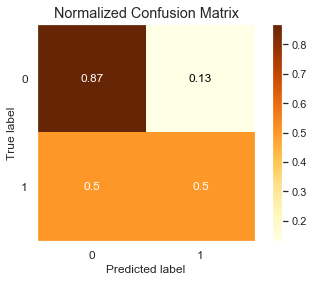

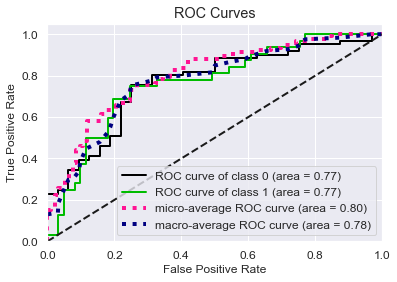

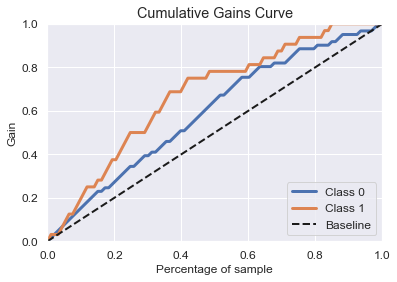

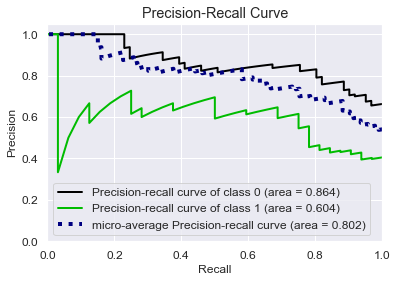

In [85]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
# Logistic Regression

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
s1 = logreg.score(X_train, y_train)
s2 = logreg.score(X_test, y_test)

print("Logistic reggession")
print("Training set accuracy :", s1 )
print("Test set accuracy     :", s2 )

#using only the principle components
pca = PCA(n_components = 4)
PC_train = pca.fit_transform(X_train)
logpca = LogisticRegression(solver='lbfgs')
logpca.fit(PC_train, y_train)
print("Training set accuracy with PCA data:", logpca.score(PC_train, y_train))

y_pred_log_reg = logreg.predict(X_test)
y_probas_log_reg = logreg.predict_proba(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_log_reg, normalize=True, cmap='YlOrBr')
plt.show()
skplt.metrics.plot_roc(y_test, y_probas_log_reg)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas_log_reg)
plt.show()
skplt.metrics.plot_precision_recall(y_test, y_probas_log_reg)
plt.show()

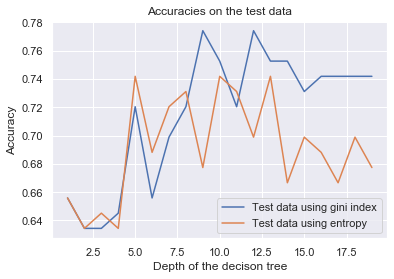

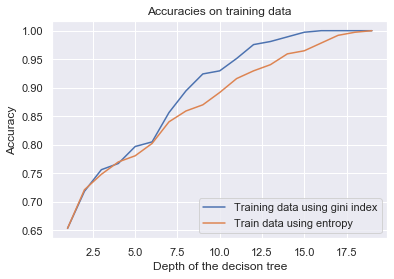

In [94]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

#we want to find the optimum depth of tree
depth1 = np.arange(1, 20)
acctest1 = []
acctrain1 = []
acctest12 = []
acctrain12 = []

for d in depth1:
    dec_tree = DecisionTreeClassifier(max_depth=d, random_state=0)
    dec_tree.fit(X_train, y_train)
    acctest1.append(dec_tree.score(X_test, y_test))
    acctrain1.append(dec_tree.score(X_train, y_train))
    dec_treet = DecisionTreeClassifier(max_depth=d,criterion='entropy',random_state=0)
    dec_treet.fit(X_train, y_train)
    acctest12.append(dec_treet.score(X_test, y_test))
    acctrain12.append(dec_treet.score(X_train, y_train))

plt.figure()
plt.plot(depth1, acctest1, label="Test data using gini index")
plt.plot(depth1, acctest12, label="Test data using entropy")
plt.xlabel("Depth of the decison tree")
plt.ylabel("Accuracy")
plt.title("Accuracies on the test data")
plt.legend()
plt.show()

plt.figure()
plt.plot(depth1, acctrain1, label="Training data using gini index")
plt.plot(depth1, acctrain12, label="Train data using entropy")
plt.xlabel("Depth of the decison tree")
plt.ylabel("Accuracy")
plt.title("Accuracies on training data")
plt.legend()
plt.show()

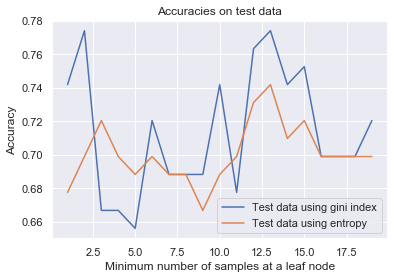

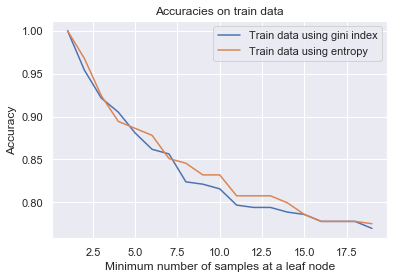

In [99]:
#want to find the minimum sample leaves 
leaf = np.arange(1, 20)
acctest2 = []
acctrain2 = []
acctest22 = []
acctrain22 = []

for l in leaf:
    dec_tree = DecisionTreeClassifier(min_samples_leaf=l,random_state=0)
    dec_tree.fit(X_train, y_train)
    acctest2.append(dec_tree.score(X_test, y_test))
    acctrain2.append(dec_tree.score(X_train, y_train))
    dec_treett = DecisionTreeClassifier(min_samples_leaf=l,criterion='entropy', random_state=0)
    dec_treett.fit(X_train, y_train)
    acctest22.append(dec_treett.score(X_test, y_test))
    acctrain22.append(dec_treett.score(X_train, y_train))

plt.figure()
plt.plot(leaf, acctest2, label="Test data using gini index")
plt.plot(leaf, acctest22, label="Test data using entropy")
plt.xlabel("Minimum number of samples at a leaf node")
plt.ylabel("Accuracy")
plt.title("Accuracies on test data")
plt.legend()

plt.figure()
plt.plot(leaf, acctrain2, label="Train data using gini index")
plt.plot(leaf, acctrain22, label="Train data using entropy")
plt.xlabel("Minimum number of samples at a leaf node")
plt.ylabel("Accuracy")
plt.title("Accuracies on train data")
plt.legend()
plt.show()


Decision tree
Training set accuracy :  0.924119241192412
Test set accuracy     : 0.7741935483870968


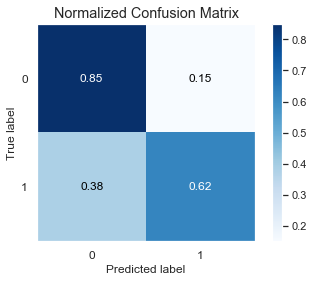

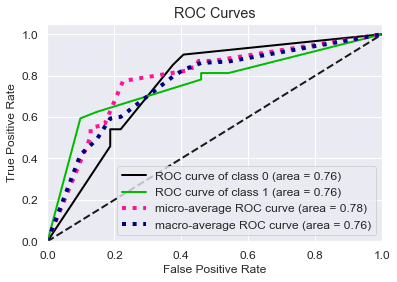

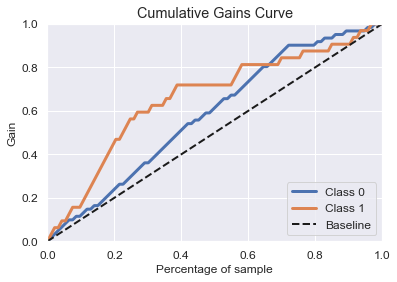

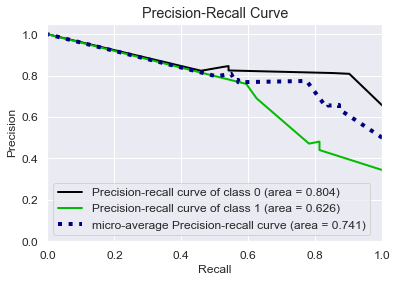

In [101]:
#The best accuracy I can get is with max_depth = 9 with gini index

#dec_tree = DecisionTreeClassifier(max_depth=None, criterion='entropy',random_state=0)
dec_tree = DecisionTreeClassifier(max_depth=9,random_state=0)
dec_tree.fit(X_train, y_train)
print("Decision tree")
print("Training set accuracy : ", dec_tree.score(X_train, y_train))
print("Test set accuracy     :", dec_tree.score(X_test, y_test))
y_pred_dectree = dec_tree.predict(X_test)
y_probas_dectree = dec_tree.predict_proba(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_dectree, normalize=True)
plt.show()
skplt.metrics.plot_roc(y_test, y_probas_dectree)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas_dectree)
plt.show()
skplt.metrics.plot_precision_recall(y_test, y_probas_dectree)
plt.show()

In [103]:
#Using a voting classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

log_clf = LogisticRegression(solver="liblinear", random_state=0)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=0)
svm_clf = SVC(gamma="auto", C=0.2, random_state=0)
sgd_clf = SGDClassifier(random_state=0)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('sgd', sgd_clf)],
    voting='hard')

voting_clf.fit(X_train, y_train)

print("Hard classifier")
print("----------------")
for classf in (log_clf, rnd_clf, svm_clf, sgd_clf, voting_clf):
    classf.fit(X_train, y_train)
    y_pred = classf.predict(X_test)
    print(classf.__class__.__name__, accuracy_score(y_test, y_pred))
print()

log_clf = LogisticRegression(solver="liblinear", random_state=0)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=0)
svm_clf = SVC(gamma="auto",C=0.2, probability=True, random_state=0)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

print("Soft classifier")
print("----------------")
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

Hard classifier
----------------
LogisticRegression 0.7419354838709677
RandomForestClassifier 0.7204301075268817
SVC 0.6451612903225806
SGDClassifier 0.7204301075268817
VotingClassifier 0.6989247311827957

Soft classifier
----------------
LogisticRegression 0.7419354838709677
RandomForestClassifier 0.7204301075268817
SVC 0.6451612903225806
VotingClassifier 0.7311827956989247


Training set accuracy : 1.0
Test set accuracy     : 0.7419354838709677


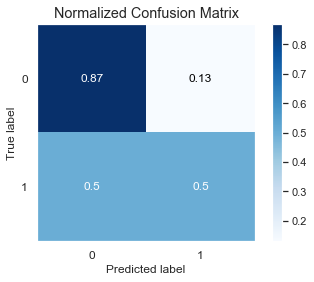

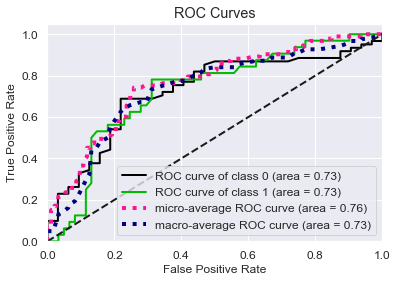

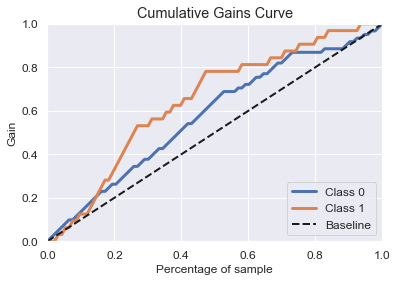

In [160]:
#bagging method
from sklearn.ensemble import BaggingClassifier
#max_samples=300
#n_estimators=290

#The best accuracy I seem to get is from using max_samples=300 and 
#n_estimators=290

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=12),max_samples=300,n_estimators=290,
    bootstrap=True, n_jobs=-1, random_state=12)

bag_clf.fit(X_train, y_train)

print("Training set accuracy :", bag_clf.score(X_train, y_train))
print("Test set accuracy     :", bag_clf.score(X_test, y_test))

y_predbag = bag_clf.predict(X_test)
y_probbag = bag_clf.predict_proba(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_predbag, normalize=True)
plt.show()
skplt.metrics.plot_roc(y_test, y_probbag)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probbag)
plt.show()

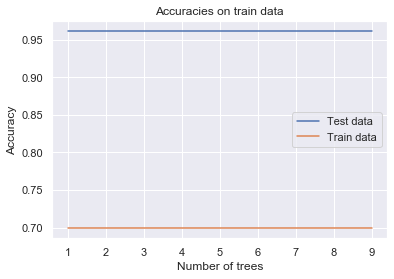

In [111]:
# This is not needed
ntrees = np.arange(1,10)
accntest = []
accntrain = []

for t in ntrees:
    bag_clf = BaggingClassifier(
        DecisionTreeClassifier(random_state=12), n_estimators=10,
        bootstrap=True, n_jobs=-1, random_state=12)

    bag_clf.fit(X_train, y_train)
    accntest.append(bag_clf.score(X_train, y_train))
    accntrain.append(bag_clf.score(X_test, y_test))

plt.figure()
plt.plot(ntrees, accntest, label="Test data")
plt.plot(ntrees, accntrain, label="Train data")
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.title("Accuracies on train data")
plt.legend()
plt.show()

Training set accuracy : 1.0
Test set accuracy     : 0.7526881720430108


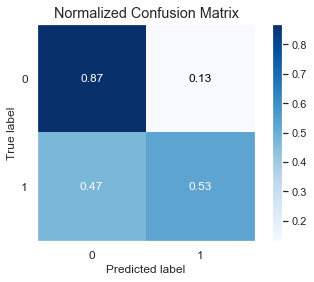

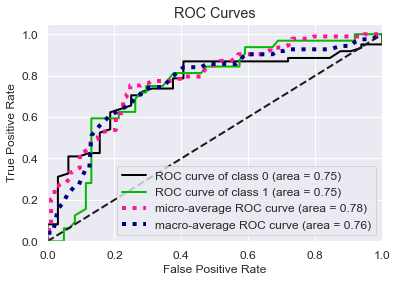

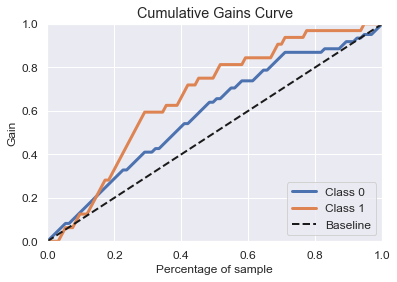

In [177]:
#Random forest

#The best accuracy I can get is with n_estimatore=195

#random_ff = RandomForestClassifier(n_estimators=100,criterion="entropy")
random_ff = RandomForestClassifier(n_estimators=195,random_state=0)
random_ff.fit(X_train, y_train)

print("Training set accuracy :", random_ff.score(X_train, y_train))
print("Test set accuracy     :", random_ff.score(X_test, y_test))

y_predrf = random_ff.predict(X_test)
y_probasrf = random_ff.predict_proba(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_predrf, normalize=True)
plt.show()
skplt.metrics.plot_roc(y_test, y_probasrf)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probasrf)
plt.show()

Test  : 0.7526881720430108
Train : 1.0
Test  : 0.7526881720430108
Train : 1.0
Test  : 0.7526881720430108
Train : 1.0
Test  : 0.7526881720430108
Train : 1.0
Test  : 0.7526881720430108
Train : 1.0
Test  : 0.7526881720430108
Train : 1.0


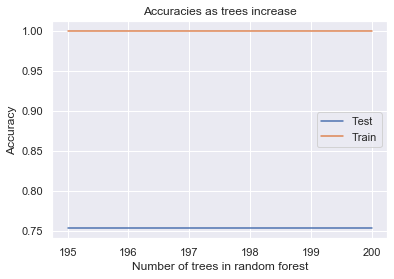

In [173]:
#Trying to find the best n_estimators
#numbertrees = [50,90,100,110,120,150,160,170,200]
#numbertrees = [170,180,183,185,189,190,193,199,204]
numbertrees = [195,196,197,198,199,200]

accrtest = []
accrtrain =[]

for q in numbertrees:
    random_ff = RandomForestClassifier(n_estimators=q, random_state=0)
    random_ff.fit(X_train, y_train)
    accrtest.append(random_ff.score(X_test, y_test))
    accrtrain.append(random_ff.score(X_train, y_train))
    print("Test  :", random_ff.score(X_test, y_test))
    print("Train :", random_ff.score(X_train, y_train))
    
plt.plot(numbertrees,accrtest, label="Test")
plt.plot(numbertrees,accrtrain, label="Train")
plt.xlabel("Number of trees in random forest")
plt.ylabel("Accuracy")
plt.title("Accuracies as trees increase")
plt.legend()
plt.show()